In [1]:
import pandas as pd

<h3>Basic</h3>

In [2]:
df_jan = pd.read_csv('Sales_Data/Sales_January_2019.csv')

In [3]:
df_jan.shape

(9723, 6)

In [4]:
df_jan.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [5]:
df_jan.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [6]:
df_jan.isnull().sum()

Order ID            26
Product             26
Quantity Ordered    26
Price Each          26
Order Date          26
Purchase Address    26
dtype: int64

<h3>Merging all csv to 1</h3>

In [7]:
import os

In [8]:
df_combined = pd.DataFrame()
for f in os.listdir('Sales_Data/'):
    df_combined = pd.concat([df_combined, pd.read_csv('Sales_Data/' + f)], axis = 0)
df_combined.to_csv('all_months_data.csv', index = False)    

In [9]:
df_combined = pd.read_csv('all_months_data.csv')
df_combined.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


<h3>Cleaning data</h3>

In [10]:
df_combined[df_combined.isna().any(axis = 1)].head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_combined.dropna(axis = 0, how='all', inplace = True)

In [12]:
df_combined.isnull().sum()
# all good now

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [13]:
# some rows have values repeated as headers
df_combined.drop(df_combined.loc[df_combined['Order ID'] == 'Order ID'].index, inplace=True)

<h3>What was best month for sales ? How much was earned each month ?</h3>

In [14]:
# picking those with non null dates
df_temp = df_combined.copy(deep = True)

In [15]:
df_temp['Month'] = df_temp['Order Date'].str.split('/').apply(lambda x:x[0])
df_temp.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [16]:
# a string value present
df_temp['Quantity Ordered'].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [17]:
# avoid 'Quantity Order' value 
df_temp = df_temp[df_temp['Quantity Ordered'].str.isnumeric()]

In [18]:
# should give blank now
df_temp[~df_temp['Quantity Ordered'].str.isnumeric()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [19]:
# new col to store total of each order
df_temp['Total'] = df_temp['Quantity Ordered'].astype(float) * df_temp['Price Each'].astype(float)
df_temp.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [20]:
df_temp_month_grouped = df_temp.groupby(['Month'])
#df_temp_month_grouped
df_temp_month_sales = df_temp_month_grouped['Total'].apply(lambda x: x.sum()).reset_index()
df_temp_month_sales[df_temp_month_sales['Total'] == df_temp_month_sales['Total'].max()]

,Month,Total
11,12,4613443.34


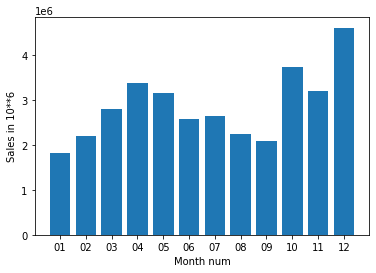

In [21]:
import matplotlib.pyplot as plt
plt.bar(df_temp_month_sales['Month'], df_temp_month_sales['Total'])
plt.xlabel('Month num')
plt.ylabel('Sales in 10**6')
plt.show()

<h3>What city had highest number of sales ?</h3>

In [22]:
def extract_city(s):
    return s.split(',')[1].strip()
def extract_state(s):
    return s.split(',')[2].strip().split(' ')[0]

In [23]:
import re
df_temp = df_combined.copy(deep=True)
df_temp['Purchase City'] = df_temp['Purchase Address'].apply(lambda x: extract_city(x) + ' ' + extract_state(x))

In [24]:
df_temp_city_grouped = df_temp.groupby(['Purchase City'])
df_temp_city_sales = df_temp_city_grouped['Order ID'].count().reset_index()
df_temp_city_sales.rename(columns={'Order ID' : 'Num Sales'}, inplace = True)

<BarContainer object of 10 artists>

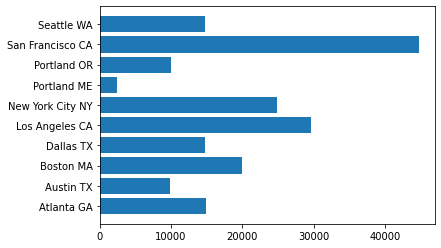

In [25]:
# observe 2 portland available hence extract state was used
plt.barh(df_temp_city_sales['Purchase City'], df_temp_city_sales['Num Sales'])

<h3>What is the best time to display advertisements ?</h3>

In [26]:
df_temp = df_combined.copy(deep = True)

In [27]:
df_temp['Order Date'] = pd.to_datetime(df_temp['Order Date'])

In [28]:
df_temp['Hour'] = df_temp['Order Date'].dt.hour

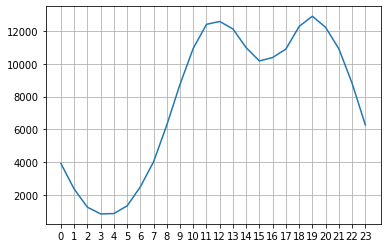

In [29]:
df_temp_hour_grouped = df_temp.groupby(['Hour'])
df_temp_hour_count = df_temp_hour_grouped['Order ID'].count().reset_index()
plt.plot(df_temp_hour_count['Hour'], df_temp_hour_count['Order ID'])
plt.xticks(df_temp_hour_count['Hour'])
plt.grid()
plt.show()

<h3>Most bought product</h3>

In [30]:
df_temp = df_combined.copy(deep = True)

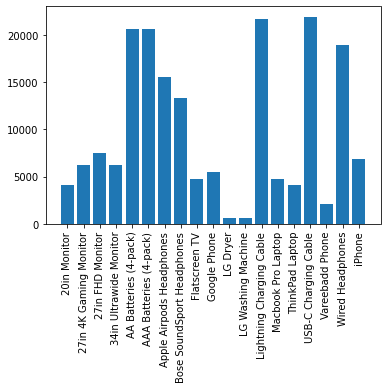

In [31]:
df_temp_product_grouped = df_temp.groupby(['Product'])
df_temp_product_count = df_temp_product_grouped['Order ID'].count().reset_index()
plt.bar(df_temp_product_count['Product'], df_temp_product_count['Order ID'])
plt.xticks(df_temp_product_count['Product'], rotation='vertical')
plt.show()

<h3>What products are most often sold together ?</h3>

In [76]:
# picking up only those orders which were bought with some other orders, i.e. keeping only those where order Id x contains more than 1 product 
df_temp = df_combined[df_combined['Order ID'].duplicated(keep = False)]
# merging all prods from same order id into one , separated value
df_temp['Grouped Products'] = df_temp.groupby(['Order ID'])['Product'].transform(lambda x: ', '.join(x.sort_values()))
# keeping only first occurence of each order id

df_temp = df_temp[['Order ID', 'Grouped Products']].drop_duplicates()

<ipython-input-76-b6856c1b5180>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Grouped Products'] = df_temp.groupby(['Order ID'])['Product'].transform(lambda x: ', '.join(x.sort_values()))


In [78]:
df_temp.groupby(['Grouped Products'])['Order ID'].count().sort_values(ascending = False)

Grouped Products
Lightning Charging Cable, iPhone                                      891
Google Phone, USB-C Charging Cable                                    868
Wired Headphones, iPhone                                              374
USB-C Charging Cable, Vareebadd Phone                                 318
Google Phone, Wired Headphones                                        311
                                                                     ... 
Flatscreen TV, LG Dryer                                                 1
Bose SoundSport Headphones, Google Phone, Lightning Charging Cable      1
Bose SoundSport Headphones, Flatscreen TV, Vareebadd Phone              1
Apple Airpods Headphones, Vareebadd Phone, Wired Headphones             1
iPhone, iPhone                                                          1
Name: Order ID, Length: 227, dtype: int64

In [90]:
# counting all possible combinations in a group of size x
x = 2

from itertools import combinations
from collections import Counter

count = Counter()

for row in df_temp['Grouped Products']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, x)))

for k, v in count.most_common(10):
    print(k, v)

('Lightning Charging Cable', 'iPhone') 1015
('Google Phone', 'USB-C Charging Cable') 999
('Wired Headphones', 'iPhone') 462
('Google Phone', 'Wired Headphones') 423
('Apple Airpods Headphones', 'iPhone') 373
('USB-C Charging Cable', 'Vareebadd Phone') 368
('Bose SoundSport Headphones', 'Google Phone') 228
('USB-C Charging Cable', 'Wired Headphones') 205
('Vareebadd Phone', 'Wired Headphones') 149
('Lightning Charging Cable', 'Wired Headphones') 129
